In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn import manifold
from sklearn.datasets import fetch_openml
import plotly.graph_objs as go
from plotly.subplots import make_subplots



%matplotlib inline

# Load MNIST data

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Extract the images and labels from the dataset
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Display MNIST

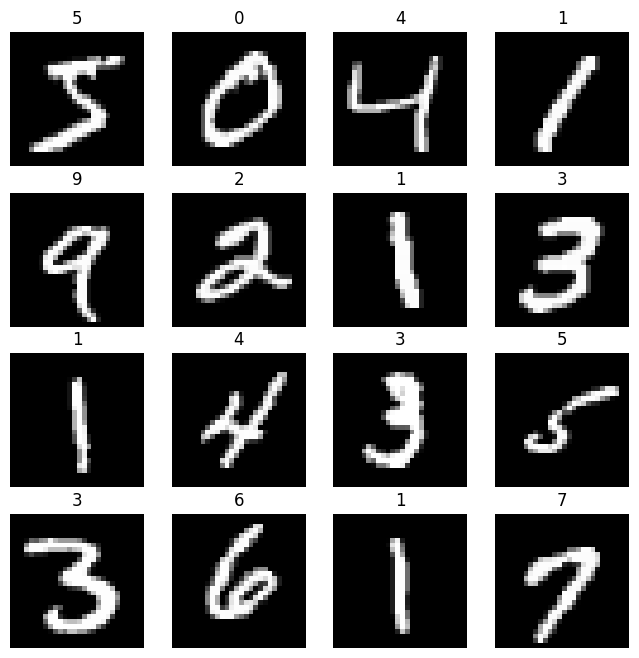

In [4]:
# Reshape the images from a flat vector to a 28x28 matrix
X = np.reshape(X.values, (-1, 28, 28))

# Visualize some of the images
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(X[index], cmap='gray')
        ax[i, j].set_title(str(y[index]))
        ax[i, j].axis('off')

plt.show()

# Reduce Dimension

## To 2 dimension with PCA

In [5]:
# Extract the images and labels from the dataset
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

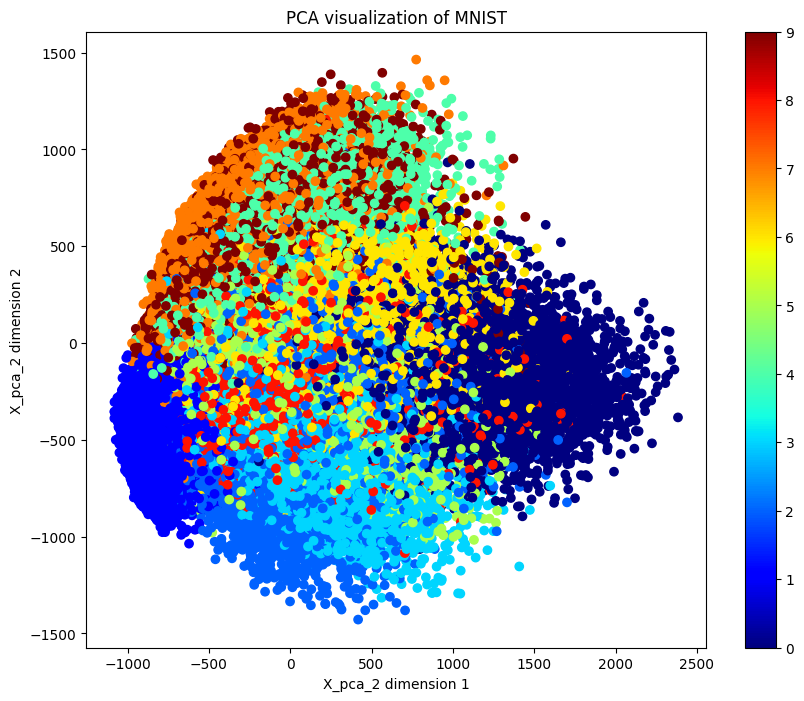

In [6]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.title('PCA visualization of MNIST')
plt.xlabel('X_pca_2 dimension 1')
plt.ylabel('X_pca_2 dimension 2')
plt.show()

## To 3 dimension with PCA

In [7]:
pca = PCA(n_components=3)
X_pca_3 = pca.fit_transform(X)

# Visualize the results in 3D using Plotly
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
scatter = go.Scatter3d(x=X_pca_3[:, 0], y=X_pca_3[:, 1], z=X_pca_3[:, 2], mode='markers', marker=dict(color=y, colorscale='Jet'))
fig.add_trace(scatter)
fig.update_traces(marker_size = 3)
fig.update_layout(title_text='PCA visualization of MNIST (3D)', scene=dict(xaxis_title='PCA dimension 1', yaxis_title='PCA dimension 2', zaxis_title='PCA dimension 3'))
fig.show()

## To 2 dimensions with T-SNE

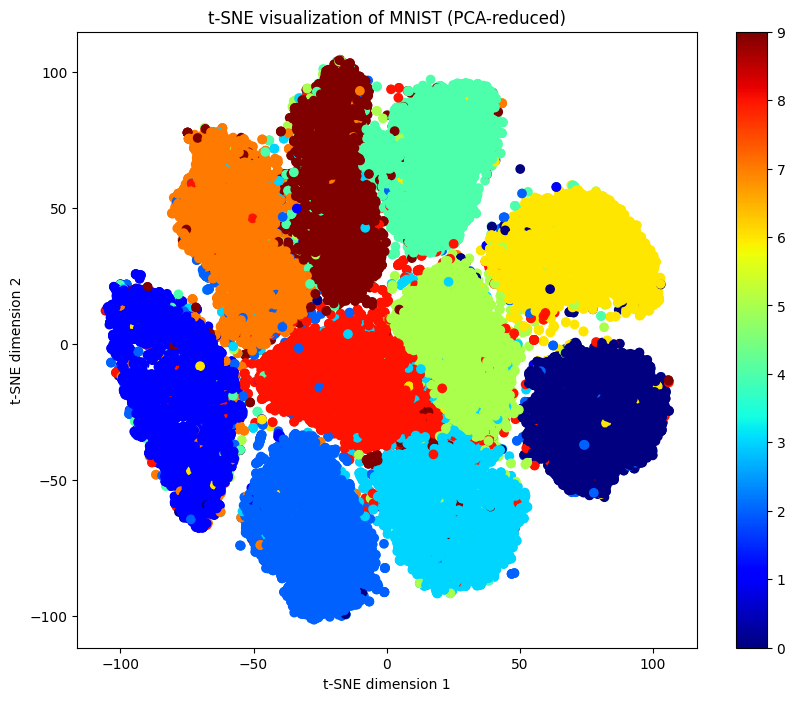

In [8]:
# Apply t-SNE 
tsne = TSNE(n_components=2)
X_tsne_2 = tsne.fit_transform(X)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne_2[:, 0], X_tsne_2[:, 1], c=y, cmap='jet')
plt.colorbar()
plt.title('t-SNE visualization of MNIST')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

## To 3 dimension with T-SNE

In [9]:
# Apply t-SNE 
tsne = TSNE(n_components=3)
X_tsne_3 = tsne.fit_transform(X)

# Visualize the results in 3D using Plotly
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])
scatter = go.Scatter3d(x=X_tsne_3[:, 0], y=X_tsne_3[:, 1], z=X_tsne_3[:, 2], mode='markers', marker=dict(color=y, colorscale='Jet'))
fig.add_trace(scatter)
fig.update_traces(marker_size = 3)
fig.update_layout(title_text='TNSE visualization of MNIST (3D)', scene=dict(xaxis_title='TNSE dimension 1', yaxis_title='TNSE dimension 2', zaxis_title='TNSE dimension 3'))
fig.show()

# Try to fit the model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## 2 dimensions fitting


In [19]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the dataset to 2 dimensions
pca = PCA(n_components=2)
X_train_pca_2 = pca.fit_transform(X_train)
X_test_pca_2 = pca.transform(X_test)

# Train a Random Forest classifier on the PCA-reduced training data
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train_pca_2, y_train)

# Test the classifier on the PCA-reduced testing data
accuracy = clf.score(X_test_pca_2, y_test)
print("Accuracy = {:.2f}%".format(accuracy * 100))

Accuracy = 42.01%


## 3 dimensions fitting


In [20]:
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA to reduce the dimensionality of the dataset to 2 dimensions
pca = PCA(n_components=3)
X_train_pca_3 = pca.fit_transform(X_train)
X_test_pca_3 = pca.transform(X_test)

# Train a Random Forest classifier on the PCA-reduced training data
clf = RandomForestClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train_pca_3, y_train)

# Test the classifier on the PCA-reduced testing data
accuracy = clf.score(X_test_pca_3, y_test)
print("Accuracy = {:.2f}%".format(accuracy * 100))

Accuracy = 49.93%
